# Machine Learning

## Data Cleaning

I begin by loading the .csv file into pandas. Pandas is most suitable for this because of the size of the file. low_memory=False prevents Pandas providing a warning about the mixed types of the data. 'df' is the standard variable name choice for a data frame.

In [1]:
%matplotlib inline
import pandas as pd
df = pd.read_csv("./latestdata/latestdata.csv", low_memory=False)

Once it has loaded, I look at the head of the .csv to get a brief overview.

In [2]:
df.head()

,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,...,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
0,000-1-1,NaN,male,Shek Lei,Hong Kong,China,22.365019,114.133808,point,NaN,...,NaN,NaN,Shek Lei,NaN,NaN,Hong Kong,China,8029.0,NaN,NaN
1,000-1-10,78,male,Vo Euganeo,Veneto,Italy,45.297748,11.658382,point,NaN,...,22.02.2020,NaN,Vo' Euganeo,NaN,NaN,Veneto,Italy,8954.0,NaN,NaN
2,000-1-100,61,female,NaN,NaN,Singapore,1.353460,103.815100,admin0,NaN,...,17.02.2020,NaN,NaN,NaN,NaN,NaN,Singapore,200.0,NaN,NaN
3,000-1-1000,NaN,NaN,Zhengzhou City,Henan,China,34.629310,113.468000,admin2,NaN,...,NaN,NaN,NaN,NaN,Zhengzhou City,Henan,China,10091.0,NaN,NaN
4,000-1-10000,NaN,NaN,Pingxiang City,Jiangxi,China,27.513560,113.902900,admin2,NaN,...,NaN,NaN,NaN,NaN,Pingxiang City,Jiangxi,China,7060.0,NaN,NaN


Then I look at the structure of the columns so we can begin analysis of the data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676311 entries, 0 to 2676310
Data columns (total 33 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ID                        object 
 1   age                       object 
 2   sex                       object 
 3   city                      object 
 4   province                  object 
 5   country                   object 
 6   latitude                  float64
 7   longitude                 float64
 8   geo_resolution            object 
 9   date_onset_symptoms       object 
 10  date_admission_hospital   object 
 11  date_confirmation         object 
 12  symptoms                  object 
 13  lives_in_Wuhan            object 
 14  travel_history_dates      object 
 15  travel_history_location   object 
 16  reported_market_exposure  object 
 17  additional_information    object 
 18  chronic_disease_binary    bool   
 19  chronic_disease           object 
 20  source                  

There is a lot of data to begin processing. I need to analyse the columns further before I can do any meaningful analysis since there is so much data and the data type is currently very generic as 'object'. 

In [4]:
df.isna().sum()

ID                                0
age                         2098293
sex                         2096154
city                         977681
province                     452664
country                         115
latitude                         61
longitude                        61
geo_resolution                   61
date_onset_symptoms         2414712
date_admission_hospital     2560100
date_confirmation            108489
symptoms                    2674259
lives_in_Wuhan              2671973
travel_history_dates        2673700
travel_history_location     2667089
reported_market_exposure    2675242
additional_information      2630456
chronic_disease_binary            0
chronic_disease             2676096
source                       566964
sequence_available          2676299
outcome                     2368929
date_death_or_discharge     2673163
notes_for_discussion        2675671
location                    2662935
admin3                      2595877
admin2                      

I first want to look at some generic statistics about the features to begin thinking about the best way to go about cleaning it. Here I plot:
- all of the countries that make up at least 1% of the records (if this condition is not imposed then the bar chart is unreadable)

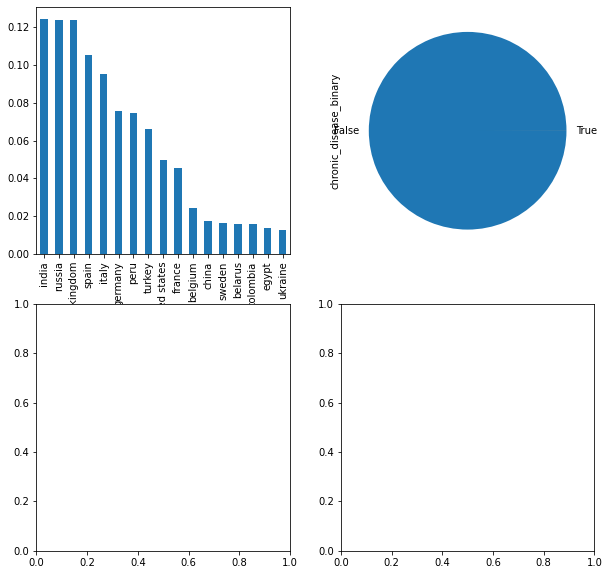

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

filtered_countries = df[df["country"].map(df["country"].value_counts(normalize=True, dropna=False)) > 0.01]["country"]
filtered_countries.str.lower().value_counts(normalize=True, dropna=False).plot(ax=axs[0][0], kind="bar")

df["chronic_disease_binary"].value_counts(normalize=True, dropna=False).plot(ax=axs[0][1], kind="pie")

plt.show()

Since my question is related to predicting the outcome for a specific person I need that the outcome is not N/A. This will drastically reduce the number of records however.

In [6]:
df = df[df["outcome"].notna()]
df.to_csv("with_outcome.csv", index=False)

This has now removed all of the rows without an outcome.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307382 entries, 0 to 673607
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        307382 non-null  object 
 1   age                       34435 non-null   object 
 2   sex                       38115 non-null   object 
 3   city                      263094 non-null  object 
 4   province                  306481 non-null  object 
 5   country                   307380 non-null  object 
 6   latitude                  307382 non-null  float64
 7   longitude                 307382 non-null  float64
 8   geo_resolution            307382 non-null  object 
 9   date_onset_symptoms       3543 non-null    object 
 10  date_admission_hospital   301 non-null     object 
 11  date_confirmation         307308 non-null  object 
 12  symptoms                  476 non-null     object 
 13  lives_in_Wuhan            174 non-null     o

This has drastically reduced the dataset size from ~2.6m to ~307k records. Of course this is not the most desirable outcome but I cannot impute the outcome data as it will skew any models drastically. One advantage of this is that I will have less records to manage though so the models should train faster which will be useful for experimenting.

Now I look at the summary of the na data points:

In [8]:
df.isna().sum()

ID                               0
age                         272947
sex                         269267
city                         44288
province                       901
country                          2
latitude                         0
longitude                        0
geo_resolution                   0
date_onset_symptoms         303839
date_admission_hospital     307081
date_confirmation               74
symptoms                    306906
lives_in_Wuhan              307208
travel_history_dates        307067
travel_history_location     306414
reported_market_exposure    307366
additional_information      288785
chronic_disease_binary           0
chronic_disease             307257
source                       27687
sequence_available          307378
outcome                          0
date_death_or_discharge     306188
notes_for_discussion        307231
location                    300812
admin3                      307359
admin2                      306873
admin1              

There is quite a significant amount of data missing. Some of the columns will essentially be unrecoverable because of the proportion of missing data. These columns that I have identified immediately are "date_onset_symptoms", "date_admission_hospital", "symptoms", "lives_in_Wuhan", "reported_market_exposure", "sequence_available", "date_death_or_discharge", "notes_for_discussion", "admin3", "admin2" as there is simply too much data missing. So I will drop these columns from the dataset.

In [9]:
df = df.drop(["date_onset_symptoms", "date_admission_hospital","symptoms", "lives_in_Wuhan", "reported_market_exposure",
              "sequence_available", "date_death_or_discharge", "notes_for_discussion", "admin3", "admin2"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307382 entries, 0 to 673607
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       307382 non-null  object 
 1   age                      34435 non-null   object 
 2   sex                      38115 non-null   object 
 3   city                     263094 non-null  object 
 4   province                 306481 non-null  object 
 5   country                  307380 non-null  object 
 6   latitude                 307382 non-null  float64
 7   longitude                307382 non-null  float64
 8   geo_resolution           307382 non-null  object 
 9   date_confirmation        307308 non-null  object 
 10  travel_history_dates     315 non-null     object 
 11  travel_history_location  968 non-null     object 
 12  additional_information   18597 non-null   object 
 13  chronic_disease_binary   307382 non-null  bool   
 14  chro

Now I want to analyse the travel_history_dates and travel_history_location to try and increase the number of records with a travel_history_binary set. To do this I want to look at all of the records that have either travel_history_dates or travel_history_location set and an empty travel_history_binary:

In [10]:
travel_binary_frame = df[(df["travel_history_binary"].isna()) &
                         ((df["travel_history_dates"].notna()) | (df["travel_history_location"].notna()))]
travel_binary_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 43285
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       93 non-null     object 
 1   age                      82 non-null     object 
 2   sex                      89 non-null     object 
 3   city                     80 non-null     object 
 4   province                 73 non-null     object 
 5   country                  93 non-null     object 
 6   latitude                 93 non-null     float64
 7   longitude                93 non-null     float64
 8   geo_resolution           93 non-null     object 
 9   date_confirmation        93 non-null     object 
 10  travel_history_dates     72 non-null     object 
 11  travel_history_location  93 non-null     object 
 12  additional_information   69 non-null     object 
 13  chronic_disease_binary   93 non-null     bool   
 14  chronic_disease          

This leaves 93 records. I want to see the values that are present in the travel_history_location since it is not-null for all of the records here:

In [11]:
unique_travel_locations = travel_binary_frame["travel_history_location"].str.lower().unique()
unique_travel_locations

array(['china', 'wuhan city, hubei', 'milan, lombardia, italy',
       'daegu, south korea', 'jakarta, indonesia',
       'johor, malaysia; singapore',
       'wuhan city, hubei; hong kong, china', 'hubei',
       'haute-savoie, auvergne-rhone-alpes, france',
       'new york city, new york, united states', "xi'an city, shaanxi",
       "xiogan city, hubei; xi'an city, shaanxi", 'weinan city, shaanxi',
       'ankang city, shaanxi', 'south korea', 'shenzhen city, guangdong',
       'nha trang, khanh hoa, vietnam', 'suzhou city, jiangsu',
       'dongguan city, guangdong',
       'tianmen city, hubei; wuhan city, hubei; anhui',
       'guiyang city, guizhou', 'italy', 'ezhou city, hubei', 'france',
       'bavaria, germany', 'thailand', 'malaysia'], dtype=object)

These are all locations (I wanted to check it didn't say that didn't travel in this column) so I can set all of these records travel_history_binary to True in the main data frame and drop the travel_history_dates and travel_history_location columns.

In [12]:
def clean_travel_binary(row):
    if pd.notna(row["travel_history_binary"]):
        return row["travel_history_binary"]

    if pd.isna(row["travel_history_dates"]) and pd.isna(row["travel_history_location"]):
        return row["travel_history_binary"]

    return True

df["travel_history_binary"] = df.apply(clean_travel_binary, axis=1)
df = df.drop(["travel_history_dates", "travel_history_location"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307382 entries, 0 to 673607
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       307382 non-null  object 
 1   age                      34435 non-null   object 
 2   sex                      38115 non-null   object 
 3   city                     263094 non-null  object 
 4   province                 306481 non-null  object 
 5   country                  307380 non-null  object 
 6   latitude                 307382 non-null  float64
 7   longitude                307382 non-null  float64
 8   geo_resolution           307382 non-null  object 
 9   date_confirmation        307308 non-null  object 
 10  additional_information   18597 non-null   object 
 11  chronic_disease_binary   307382 non-null  bool   
 12  chronic_disease          125 non-null     object 
 13  source                   279695 non-null  object 
 14  outc

The remaining records without a travel_history_binary make up a tiny proportion of the dataset (232 out of 307382 records) so we can drop these as we cannot recover their true value.

In [13]:
df = df[df["travel_history_binary"].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307150 entries, 0 to 673607
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       307150 non-null  object 
 1   age                      34221 non-null   object 
 2   sex                      37947 non-null   object 
 3   city                     262879 non-null  object 
 4   province                 306297 non-null  object 
 5   country                  307149 non-null  object 
 6   latitude                 307150 non-null  float64
 7   longitude                307150 non-null  float64
 8   geo_resolution           307150 non-null  object 
 9   date_confirmation        307115 non-null  object 
 10  additional_information   18463 non-null   object 
 11  chronic_disease_binary   307150 non-null  bool   
 12  chronic_disease          100 non-null     object 
 13  source                   279463 non-null  object 
 14  outc

There still remains quite a bit of redundant information encoded in the data. Namely, location and admin1 are determined by the latitude and longitude which we have for all of the records (whereas location and admin1 are missing for some). I also think that additional_information and data_moderator_initials are metadata about the collation of the data set rather than about the patients instead. This will be easiest to check by looking at a few records that have these values set:

In [14]:
pd.set_option("display.max_columns", None)
df[df["data_moderator_initials"].notna()].head()

,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_confirmation,additional_information,chronic_disease_binary,chronic_disease,source,outcome,location,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
41396,000-1-73,37,male,Gold Coast,Queensland,Australia,-28.01670,153.400000,point,05.02.2020,QLD Case 4 part of the same travel group of pa...,False,NaN,https://twitter.com/allysonhorn/status/1224995...,discharge,Gold Coast,Queensland,Australia,3616.0,SL,True
135171,002-113709,NaN,NaN,NaN,West Bengal,India,23.79776,87.986406,point,27.04.2020,NaN,False,NaN,mohfw.gov.in,Hospitalized,NaN,NaN,India,11129.0,TR,False
135173,002-113710,NaN,NaN,NaN,West Bengal,India,23.79776,87.986406,point,27.04.2020,NaN,False,NaN,mohfw.gov.in,Hospitalized,NaN,NaN,India,11129.0,TR,False
135174,002-113711,NaN,NaN,NaN,West Bengal,India,23.79776,87.986406,point,27.04.2020,NaN,False,NaN,mohfw.gov.in,Hospitalized,NaN,NaN,India,11129.0,TR,False
135175,002-113712,NaN,NaN,NaN,West Bengal,India,23.79776,87.986406,point,27.04.2020,NaN,False,NaN,mohfw.gov.in,Hospitalized,NaN,NaN,India,11129.0,TR,False


In [15]:
df[df["additional_information"].notna()].head()

,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_confirmation,additional_information,chronic_disease_binary,chronic_disease,source,outcome,location,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
0,000-1-1,NaN,male,Shek Lei,Hong Kong,China,22.365019,114.133808,point,14.02.2020,Case 55; mainland China travel via the Lok Ma ...,False,NaN,https://www.scmp.com/news/hong-kong/health-env...,"critical condition, intubated as of 14.02.2020",Shek Lei,Hong Kong,China,8029.0,NaN,True
1113,000-1-110,1,male,KK Women’s and Children’s Hospital,NaN,Singapore,1.310490,103.846761,point,16.02.2020,Case 76; Singapore Citizen who was among the g...,False,NaN,https://bnonews.com/wp-content/uploads/2020/02...,discharge,NaN,NaN,Singapore,10332.0,NaN,True
1446,000-1-113,32,male,National Centre for Infectious Diseases,NaN,Singapore,1.322098,103.847200,point,21.02.2020,"Case 87; Wuhan evacuation, linked to case #76",False,NaN,https://www.moh.gov.sg/news-highlights/details...,discharge,National Centre for Infectious Diseases,NaN,Singapore,6480.0,NaN,True
2112,000-1-119,NaN,female,NaN,Ticino,Switzerland,46.298856,8.808264,admin1,25.02.2020,Infected at an event on t he 15th Feb 2020,False,NaN,https://www.admin.ch/gov/de/start/dokumentatio...,discharge,NaN,Ticino,Switzerland,860.0,NaN,True
2224,000-1-120,22,female,NaN,Jeju,South Korea,33.384640,126.555100,admin1,23.02.2020,Case 222; Jeju Case 2,False,NaN,https://www.jeju.go.kr/corona19.jsp#corona-main,discharge,NaN,Jeju,South Korea,501.0,NaN,True


It is apparent that additional_information and data_moderator_initials are not going to be processable for machine learning purposes. I will drop all of these columns.

In [16]:
df = df.drop(["location", "admin1", "additional_information", "data_moderator_initials"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307150 entries, 0 to 673607
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      307150 non-null  object 
 1   age                     34221 non-null   object 
 2   sex                     37947 non-null   object 
 3   city                    262879 non-null  object 
 4   province                306297 non-null  object 
 5   country                 307149 non-null  object 
 6   latitude                307150 non-null  float64
 7   longitude               307150 non-null  float64
 8   geo_resolution          307150 non-null  object 
 9   date_confirmation       307115 non-null  object 
 10  chronic_disease_binary  307150 non-null  bool   
 11  chronic_disease         100 non-null     object 
 12  source                  279463 non-null  object 
 13  outcome                 307150 non-null  object 
 14  country_new         

1 record is missing the country so lets look at the record

In [17]:
missing_country = df[df["country"].isna()]
missing_country

,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_confirmation,chronic_disease_binary,chronic_disease,source,outcome,country_new,admin_id,travel_history_binary
135606,002-11410,60-69,male,NaN,Taiwan,NaN,23.75947,120.9559,admin1,15.02.2020,True,"hepatitis B, diabetes",https://www.cdc.gov.tw/Bulletin/Detail/C7Sfkry...,death,NaN,846.0,True


It is also missing the country_new field. It is unclear what country to put it under, I will see if there are other records with the province as Taiwan in the dataset.

In [18]:
province_taiwan = df[df["country"].str.lower() == "taiwan"]
province_taiwan

,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_confirmation,chronic_disease_binary,chronic_disease,source,outcome,country_new,admin_id,travel_history_binary


There are none so it would be most appropriate to drop this record as it is only 1 / 307150 records

In [19]:
df = df[df["country"].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307149 entries, 0 to 673607
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      307149 non-null  object 
 1   age                     34220 non-null   object 
 2   sex                     37946 non-null   object 
 3   city                    262879 non-null  object 
 4   province                306296 non-null  object 
 5   country                 307149 non-null  object 
 6   latitude                307149 non-null  float64
 7   longitude               307149 non-null  float64
 8   geo_resolution          307149 non-null  object 
 9   date_confirmation       307114 non-null  object 
 10  chronic_disease_binary  307149 non-null  bool   
 11  chronic_disease         99 non-null      object 
 12  source                  279462 non-null  object 
 13  outcome                 307149 non-null  object 
 14  country_new         

So we have ID, country, latitude, longitude, geo_resolution, chronic_disease_binary, outcome, admin_id, travel_history_binary for all of the records. Next I want to look at the country_new and see if it differs from the country:

In [20]:
differing_countries = df[df["country_new"].notna()]
differing_countries = differing_countries[differing_countries["country"].str.lower() 
                                          != differing_countries["country_new"].str.lower()]
differing_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      0 non-null      object 
 1   age                     0 non-null      object 
 2   sex                     0 non-null      object 
 3   city                    0 non-null      object 
 4   province                0 non-null      object 
 5   country                 0 non-null      object 
 6   latitude                0 non-null      float64
 7   longitude               0 non-null      float64
 8   geo_resolution          0 non-null      object 
 9   date_confirmation       0 non-null      object 
 10  chronic_disease_binary  0 non-null      bool   
 11  chronic_disease         0 non-null      object 
 12  source                  0 non-null      object 
 13  outcome                 0 non-null      object 
 14  country_new             0 non-null      object 
 15  a

If we exclude non-NA country_new then we have 0 records when looking for differences so we can safely drop the country_new feature as it is redundant

In [21]:
df = df.drop("country_new", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307149 entries, 0 to 673607
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      307149 non-null  object 
 1   age                     34220 non-null   object 
 2   sex                     37946 non-null   object 
 3   city                    262879 non-null  object 
 4   province                306296 non-null  object 
 5   country                 307149 non-null  object 
 6   latitude                307149 non-null  float64
 7   longitude               307149 non-null  float64
 8   geo_resolution          307149 non-null  object 
 9   date_confirmation       307114 non-null  object 
 10  chronic_disease_binary  307149 non-null  bool   
 11  chronic_disease         99 non-null      object 
 12  source                  279462 non-null  object 
 13  outcome                 307149 non-null  object 
 14  admin_id            

Then lets look at the distribution of the chronic_disease_binary

In [22]:
df["chronic_disease_binary"].value_counts(dropna=False)

False    307048
True        101
Name: chronic_disease_binary, dtype: int64

Then lets see if we can do anything with the free text chronic_disease

In [23]:
chronic_diseases = df["chronic_disease"].str.lower().unique()
len(chronic_diseases)

49

In [24]:
chronic_diseases

array([nan, 'hypertension', 'diabetes, hypertension',
       '"thought to have had other pre-existing conditions"',
       'history of hypertension, type 2 diabetes, coronary heart disease for which a stent had been implanted, and lung cancer',
       'prostate hypertrophy', 'chronic pulmonary condition',
       'hiv positive', 'diabetes', 'hypertension:diabetes',
       'chronic kidney disease:hypertension:diabetes', 'asthma:diabetes',
       'asthma', 'hypertension:diabetes:valvular heart disease',
       'chronic kidney disease', 'hypertensive',
       'diabetes:hypertension:chronic kidney disease',
       'diabetes:hypertenstion:upper git bleeding',
       'diabetes:hypertension', 'chronic kidney disease:hypertension',
       'pre-renal azotemia:cardiomyopathy:hypertension:diabetes',
       'hypertension:diabetes:asthma', 'hypertension:colon cancer',
       'chronic kidney disease:hypertension:diabetes:ischemic heart disease',
       'pre-renal azotemia:diabetes:hypertension',
    

The data looks useful but it will be difficult to categorise and is likely to lead to overfitting as if we introduce a lot of categories then very few records will have a chronic disease assigned to them. Using the binary still risks this overfitting but it shouldn't be as impactful. So I will use these to set all of those with a chronic_disease free text to set the chronic_disease_binary to True if it is missing from a row. (clarify this) since all of the ones above are chronic diseases

In [25]:
def clean_chronic_binary(row):
    if pd.notna(row["chronic_disease_binary"]):
        return row["chronic_disease_binary"]

    # If one of the columns has something then we can set it to true otherwise we don't know
    return pd.notna(row["chronic_disease_binary"])

df["chronic_disease_binary"] = df.apply(clean_chronic_binary, axis=1)
df["chronic_disease_binary"].value_counts(dropna=False)

False    307048
True        101
Name: chronic_disease_binary, dtype: int64

Then we can also drop the chronic_disease feature

In [26]:
df = df.drop(["chronic_disease"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307149 entries, 0 to 673607
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      307149 non-null  object 
 1   age                     34220 non-null   object 
 2   sex                     37946 non-null   object 
 3   city                    262879 non-null  object 
 4   province                306296 non-null  object 
 5   country                 307149 non-null  object 
 6   latitude                307149 non-null  float64
 7   longitude               307149 non-null  float64
 8   geo_resolution          307149 non-null  object 
 9   date_confirmation       307114 non-null  object 
 10  chronic_disease_binary  307149 non-null  bool   
 11  source                  279462 non-null  object 
 12  outcome                 307149 non-null  object 
 13  admin_id                307149 non-null  float64
 14  travel_history_binar

Next I want to look at the date_confirmation field as there is a tiny amount of records missing this. So it is safe to drop any record that does not have this set.

In [27]:
df = df[df["date_confirmation"].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307114 entries, 0 to 673607
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      307114 non-null  object 
 1   age                     34188 non-null   object 
 2   sex                     37914 non-null   object 
 3   city                    262845 non-null  object 
 4   province                306265 non-null  object 
 5   country                 307114 non-null  object 
 6   latitude                307114 non-null  float64
 7   longitude               307114 non-null  float64
 8   geo_resolution          307114 non-null  object 
 9   date_confirmation       307114 non-null  object 
 10  chronic_disease_binary  307114 non-null  bool   
 11  source                  279429 non-null  object 
 12  outcome                 307114 non-null  object 
 13  admin_id                307114 non-null  float64
 14  travel_history_binar

Now I want to convert the travel_history_binary to a boolean and rename some columns to clarify the meaning of their boolean status

In [28]:
df["travel_history_binary"].value_counts(dropna=False)

False    305923
True       1191
Name: travel_history_binary, dtype: int64

It is clearly ready to be made into a boolean field

In [29]:
df = df.rename(columns = { "chronic_disease_binary": "has_chronic_disease", "travel_history_binary": "has_travel_history" })
df["has_travel_history"] = df["has_travel_history"].astype("bool")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307114 entries, 0 to 673607
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   307114 non-null  object 
 1   age                  34188 non-null   object 
 2   sex                  37914 non-null   object 
 3   city                 262845 non-null  object 
 4   province             306265 non-null  object 
 5   country              307114 non-null  object 
 6   latitude             307114 non-null  float64
 7   longitude            307114 non-null  float64
 8   geo_resolution       307114 non-null  object 
 9   date_confirmation    307114 non-null  object 
 10  has_chronic_disease  307114 non-null  bool   
 11  source               279429 non-null  object 
 12  outcome              307114 non-null  object 
 13  admin_id             307114 non-null  float64
 14  has_travel_history   307114 non-null  bool   
dtypes: bool(2), float

Few records are missing the province. I will want to convert the province to categories as well, lets look at the distribution of the provinces:

In [30]:
df["province"].str.lower().value_counts(dropna=False)

maharashtra          106515
tamil nadu            35939
delhi                 29173
gujarat               28613
rajasthan             14971
                      ...  
palawan                   1
kwale county              1
snnpr                     1
compostela valley         1
maguindanao               1
Name: province, Length: 212, dtype: int64

We will need to use one-hot encoding here because if we just label the categories with numbers then it could lead to the machine learning algorithms thinking that, for example, Delhi > Gujarat whereas this has no meaning in the context. However, one-hot encoding will introduce a large number of additional features which could be an issue as it will severely impact the training time of the models especially as we many records. First, I need to see how many values are actually significant.

In [31]:
df["province"].str.lower().value_counts(dropna=False, normalize=True).to_csv("provinces.csv")

Cutting off the provinces for all classes with <1% of the share will leave 28 classes (and an extra one to bundle all the others together but this doesn't need to be a feature since if all the other class features are False then that implies it must be in the bundled class)

In [32]:
def reduce_categories(row, column_name, value_counts, keep_condition, replacement="other"):
    if pd.isna(row[column_name]):
        return replacement
    
    if keep_condition(value_counts[row[column_name].lower()]):
        return row[column_name].lower()

    return replacement

In [33]:
normalised_province_vc = df["province"].str.lower().value_counts(normalize=True) >= 0.01
province_reducer = lambda row: reduce_categories(row, "province", normalised_province_vc, lambda b: b == True)
df["province"] = df.apply(province_reducer, axis=1)
df["province"].value_counts(normalize=True, dropna=False)

maharashtra          0.346826
tamil nadu           0.117022
delhi                0.094991
gujarat              0.093167
rajasthan            0.048747
uttar pradesh        0.043642
madhya pradesh       0.043150
other                0.036996
west bengal          0.030803
andhra pradesh       0.021679
bihar                0.019752
state unassigned     0.018332
karnataka            0.014975
punjab               0.013982
telangana            0.013122
jammu and kashmir    0.011185
odisha               0.010853
haryana              0.010625
metro manila         0.010153
Name: province, dtype: float64

Now we can one-hot encode the categories and remove the original column

In [34]:
province_dummies = pd.get_dummies(df["province"].str.lower(), prefix="province", drop_first=True)
df = pd.concat([df, province_dummies], axis=1)
df = df.drop("province", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307114 entries, 0 to 673607
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          307114 non-null  object 
 1   age                         34188 non-null   object 
 2   sex                         37914 non-null   object 
 3   city                        262845 non-null  object 
 4   country                     307114 non-null  object 
 5   latitude                    307114 non-null  float64
 6   longitude                   307114 non-null  float64
 7   geo_resolution              307114 non-null  object 
 8   date_confirmation           307114 non-null  object 
 9   has_chronic_disease         307114 non-null  bool   
 10  source                      279429 non-null  object 
 11  outcome                     307114 non-null  object 
 12  admin_id                    307114 non-null  float64
 13  has_travel_his

I want to do the same now for cities

In [35]:
df["city"].str.lower().value_counts(dropna=False)

mumbai                 56178
NaN                    44269
chennai                23907
ahmedabad              20815
thane                  13085
                       ...  
ranganayakakulapeta        1
west mambalam              1
hisua                      1
imphal                     1
kithwan                    1
Name: city, Length: 2269, dtype: int64

There are a lot of cities so we need to reduce this a lot. I will map the NaN values to other immediately.

In [36]:
df["city"] = df["city"].fillna("other")
df["city"].str.lower().value_counts(dropna=False, normalize=True).to_csv("cities.csv")

I will use the same condition that I will bundle all of those with <1% of the share of the records

In [37]:
normalised_city_vc = df["city"].str.lower().value_counts(normalize=True) >= 0.01
city_reducer = lambda row: reduce_categories(row, "city", normalised_city_vc, lambda b: b == True)
df["city"] = df.apply(city_reducer, axis=1)
df["city"].value_counts(normalize=True, dropna=False)

other         0.534075
mumbai        0.182922
chennai       0.077844
ahmedabad     0.067776
thane         0.042606
pune          0.037074
unassigned    0.018332
indore        0.017655
jaipur        0.011491
kolkata       0.010224
Name: city, dtype: float64

Now I one-hot encode this feature and drop the original column

In [38]:
city_dummies = pd.get_dummies(df["city"].str.lower(), prefix="city", drop_first=True)
df = pd.concat([df, province_dummies], axis=1)
df = df.drop("city", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307114 entries, 0 to 673607
Data columns (total 49 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          307114 non-null  object 
 1   age                         34188 non-null   object 
 2   sex                         37914 non-null   object 
 3   country                     307114 non-null  object 
 4   latitude                    307114 non-null  float64
 5   longitude                   307114 non-null  float64
 6   geo_resolution              307114 non-null  object 
 7   date_confirmation           307114 non-null  object 
 8   has_chronic_disease         307114 non-null  bool   
 9   source                      279429 non-null  object 
 10  outcome                     307114 non-null  object 
 11  admin_id                    307114 non-null  float64
 12  has_travel_history          307114 non-null  bool   
 13  province_bihar

Now I need to do something similar to the source column too but first I need to parse the values to simplify them.

In [39]:
copy_df = df

In [40]:
df["source"] = df["source"].fillna("other")
df["source"].value_counts(dropna=False, normalize=True)

other                                                                                                                        0.090146
https://arogya.maharashtra.gov.in/pdf/ncovidepressnotemay29.pdf                                                              0.036368
https://phdmah.maps.arcgis.com/apps/opsdashboard/index.html#/2cc0055832264c5296890745e9ea415c                                0.017323
mohfw.gov.in                                                                                                                 0.016867
PH Data Drop                                                                                                                 0.014203
                                                                                                                               ...   
https://twitter.com/ANI/status/1260499847670628352                                                                           0.000003
http://www.nhmharyana.gov.in/WriteReadData/userfiles/file/Coro

In [41]:
from urllib.parse import urlsplit

def simplify_sources(row):
    lowercase_url = row["source"].lower()
    if lowercase_url == "other":
        return "other"

    netloc = urlsplit(lowercase_url).netloc

    if netloc == "":
        return "other"

    return netloc

df["source"] = df.apply(simplify_sources, axis=1)
df["source"].value_counts(dropna=False, normalize=True)

twitter.com                  0.438375
t.me                         0.141351
other                        0.122485
stopcorona.tn.gov.in         0.111773
arogya.maharashtra.gov.in    0.073601
                               ...   
www.kiro7.com                0.000003
apanews.net                  0.000003
tiolpost.com                 0.000003
www.africanews.com           0.000003
www.who.int                  0.000003
Name: source, Length: 202, dtype: float64

In [42]:
df["source"].str.lower().value_counts(dropna=False, normalize=True).to_csv("sources.csv")

Again, I will apply the <1% condition

In [43]:
normalised_source_vc = df["source"].str.lower().value_counts(normalize=True) >= 0.01
source_reducer = lambda row: reduce_categories(row, "source", normalised_source_vc, lambda b: b == True)
df["source"] = df.apply(source_reducer, axis=1)
df["source"].value_counts(normalize=True, dropna=False)

twitter.com                  0.438375
other                        0.160953
t.me                         0.141351
stopcorona.tn.gov.in         0.111773
arogya.maharashtra.gov.in    0.073601
www.wbhealth.gov.in          0.020556
phdmah.maps.arcgis.com       0.017323
www.deshgujarat.com          0.014079
experience.arcgis.com        0.011943
gujcovid19.gujarat.gov.in    0.010045
Name: source, dtype: float64

In [44]:
source_dummies = pd.get_dummies(df["source"].str.lower(), prefix="source", drop_first=True)
df = pd.concat([df, source_dummies], axis=1)
df = df.drop("source", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307114 entries, 0 to 673607
Data columns (total 57 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   ID                                307114 non-null  object 
 1   age                               34188 non-null   object 
 2   sex                               37914 non-null   object 
 3   country                           307114 non-null  object 
 4   latitude                          307114 non-null  float64
 5   longitude                         307114 non-null  float64
 6   geo_resolution                    307114 non-null  object 
 7   date_confirmation                 307114 non-null  object 
 8   has_chronic_disease               307114 non-null  bool   
 9   outcome                           307114 non-null  object 
 10  admin_id                          307114 non-null  float64
 11  has_travel_history                307114 non-null  b

**Things start to go downhill here I think as I just drop some columns, need to explain**


In [45]:
df = df.drop(["geo_resolution", "admin_id"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307114 entries, 0 to 673607
Data columns (total 55 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   ID                                307114 non-null  object 
 1   age                               34188 non-null   object 
 2   sex                               37914 non-null   object 
 3   country                           307114 non-null  object 
 4   latitude                          307114 non-null  float64
 5   longitude                         307114 non-null  float64
 6   date_confirmation                 307114 non-null  object 
 7   has_chronic_disease               307114 non-null  bool   
 8   outcome                           307114 non-null  object 
 9   has_travel_history                307114 non-null  bool   
 10  province_bihar                    307114 non-null  uint8  
 11  province_delhi                    307114 non-null  u

Need to map the country to categories too

In [46]:
copy_df = df.copy()
df = copy_df

In [47]:
df["country"].value_counts(dropna=False, normalize=True)

India                       0.980525
Philippines                 0.014666
Ghana                       0.001231
Nigeria                     0.000837
China                       0.000440
Paraguay                    0.000410
Ethiopia                    0.000397
Cameroon                    0.000254
Singapore                   0.000238
United States               0.000088
Vietnam                     0.000085
Zambia                      0.000072
Australia                   0.000062
South Korea                 0.000059
Niger                       0.000049
Kenya                       0.000049
Togo                        0.000046
Japan                       0.000039
Tanzania                    0.000033
Algeria                     0.000029
Eswatini                    0.000029
Romania                     0.000026
Guinea                      0.000026
Zimbabwe                    0.000023
Mozambique                  0.000023
Eritrea                     0.000020
Gabon                       0.000020
G

Might as well change the country column to is_India

In [48]:
import numpy as np

df["is_india"] = np.where(df["country"].str.lower() == "india", True, False)
df = df.drop("country", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307114 entries, 0 to 673607
Data columns (total 55 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   ID                                307114 non-null  object 
 1   age                               34188 non-null   object 
 2   sex                               37914 non-null   object 
 3   latitude                          307114 non-null  float64
 4   longitude                         307114 non-null  float64
 5   date_confirmation                 307114 non-null  object 
 6   has_chronic_disease               307114 non-null  bool   
 7   outcome                           307114 non-null  object 
 8   has_travel_history                307114 non-null  bool   
 9   province_bihar                    307114 non-null  uint8  
 10  province_delhi                    307114 non-null  uint8  
 11  province_gujarat                  307114 non-null  u

Now I need to sort out the outcome

In [49]:
# Have to use strange syntax here see https://stackoverflow.com/questions/42750551/converting-strings-to-a-lower-case-in-pandas
df.loc[:, "outcome"] = df.loc[:, "outcome"].str.lower()
df["outcome"].unique()

C:\Python38\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


array(['critical condition, intubated as of 14.02.2020', 'discharge',
       'discharged', 'death', 'recovered', 'released from quarantine',
       'stable', 'died',
       'symptoms only improved with cough. currently hospitalized for follow-up.',
       'alive', 'dead', 'deceased', 'stable condition', 'under treatment',
       'critical condition', 'receiving treatment', 'severe illness',
       'unstable', 'hospitalized',
       'treated in an intensive care unit (14.02.2020)', 'severe',
       'migrated', 'migrated_other',
       'https://www.mspbs.gov.py/covid-19.php',
       'discharged from hospital', 'not hospitalized',
       'recovering at home 03.03.2020'], dtype=object)

In [50]:
df["outcome"].value_counts()

hospitalized                                                                202475
recovered                                                                    97313
deceased                                                                      5010
died                                                                           857
under treatment                                                                370
receiving treatment                                                            257
alive                                                                          186
stable condition                                                               133
https://www.mspbs.gov.py/covid-19.php                                          126
discharge                                                                      121
stable                                                                          96
discharged                                                                      90
deat

There is one value that gives no information and that is 'https://www.mspbs.gov.py/covid-19.php'

In [51]:
df = df[df["outcome"] != "https://www.mspbs.gov.py/covid-19.php"]

In [52]:
df["outcome"].value_counts()

hospitalized                                                                202475
recovered                                                                    97313
deceased                                                                      5010
died                                                                           857
under treatment                                                                370
receiving treatment                                                            257
alive                                                                          186
stable condition                                                               133
discharge                                                                      121
stable                                                                          96
discharged                                                                      90
death                                                                           35
dead

It is unclear if hospitialized means that they survived the hospitialisation or not. I'm going to make the assumption it does for now but this could be another bit I need to change

In [53]:
copy_df = df.copy()

In [54]:
df = copy_df.copy()

In [55]:
survive_map = {
    "critical condition, intubated as of 14.02.2020": True,
    "discharge": True,
    "discharged": True,
    'death': False,
    'recovered': True,
    'released from quarantine': True,
    'stable': True,
    'died': False,
    'symptoms only improved with cough. currently hospitalized for follow-up.': True,
    'alive': True,
    'dead': False,
    'deceased': False,
    'stable condition': True,
    'under treatment': True,
    'critical condition': True,
    'receiving treatment': True,
    'severe illness': True,
    'unstable': True,
    'hospitalized': True,
    'treated in an intensive care unit (14.02.2020)': True,
    'severe': True,
    'migrated': True,
    'migrated_other': True,
    'discharged from hospital': True,
    'not hospitalized': True,
    'recovering at home 03.03.2020': True
}

df["has_survived"] = df["outcome"].map(survive_map)
df["has_survived"].value_counts(dropna=False, normalize=True)

True     0.980726
False    0.019274
Name: has_survived, dtype: float64

In [56]:
df = df.drop("outcome", axis=1)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306988 entries, 0 to 673607
Data columns (total 55 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   ID                                306988 non-null  object 
 1   age                               34188 non-null   object 
 2   sex                               37914 non-null   object 
 3   latitude                          306988 non-null  float64
 4   longitude                         306988 non-null  float64
 5   date_confirmation                 306988 non-null  object 
 6   has_chronic_disease               306988 non-null  bool   
 7   has_travel_history                306988 non-null  bool   
 8   province_bihar                    306988 non-null  uint8  
 9   province_delhi                    306988 non-null  uint8  
 10  province_gujarat                  306988 non-null  uint8  
 11  province_haryana                  306988 non-null  u

Now I will map the date_confirmation feature to a datetime type with an ordinal ordering

In [58]:
import datetime as dt
df["date_confirmation"] = pd.to_datetime(df["date_confirmation"], format="%d.%m.%Y").map(dt.datetime.toordinal)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306988 entries, 0 to 673607
Data columns (total 55 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   ID                                306988 non-null  object 
 1   age                               34188 non-null   object 
 2   sex                               37914 non-null   object 
 3   latitude                          306988 non-null  float64
 4   longitude                         306988 non-null  float64
 5   date_confirmation                 306988 non-null  int64  
 6   has_chronic_disease               306988 non-null  bool   
 7   has_travel_history                306988 non-null  bool   
 8   province_bihar                    306988 non-null  uint8  
 9   province_delhi                    306988 non-null  uint8  
 10  province_gujarat                  306988 non-null  uint8  
 11  province_haryana                  306988 non-null  u

This leaves age and sex to resolve. I want to put the age into categories such as 0-9, 10-19, 20-29, ..., 80+. This is an ordinal ordering. However, we also have a major issue in that very few rows containing age and sex. Lets look at precisely how many records that will be:

In [59]:
age_and_sex_records = df[(df["age"].notna()) & (df["sex"].notna())]
age_and_sex_records.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33401 entries, 1113 to 673607
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                33401 non-null  object 
 1   age                               33401 non-null  object 
 2   sex                               33401 non-null  object 
 3   latitude                          33401 non-null  float64
 4   longitude                         33401 non-null  float64
 5   date_confirmation                 33401 non-null  int64  
 6   has_chronic_disease               33401 non-null  bool   
 7   has_travel_history                33401 non-null  bool   
 8   province_bihar                    33401 non-null  uint8  
 9   province_delhi                    33401 non-null  uint8  
 10  province_gujarat                  33401 non-null  uint8  
 11  province_haryana                  33401 non-null  uint8  
 12  

In [60]:
copy_df = df.copy()

This reduces the dataset to ~10% of what we had. I'm going to take it as it is for now but we could try and impute these values instead but we'll experiment with that. First, lets deal with sex:

In [61]:
df = df[(df["age"].notna()) & (df["sex"].notna())]
df["sex"].value_counts(dropna=False)

male      21287
female    12114
Name: sex, dtype: int64

We have no null values but this is clearly lends itself to a boolean so lets create it:

In [62]:
df["is_male"] = np.where(df["sex"].str.lower() == "male", True, False)
df = df.drop("sex", axis=1)
df["is_male"].value_counts(dropna=False)

True     21287
False    12114
Name: is_male, dtype: int64

This finally leaves age to clean

In [63]:
df["age"].unique()

array(['1', '32', '22', '68', '44', '39', '46', '27', '40', '30', '66',
       '50-59', '42', '38', '7', '60', '63', '80-89', '33', '79', '9',
       '31', '20-29', '52', '50', '47', '65', '21', '23', '45', '25', '4',
       '40-49', '61', '29', '55', '28', '49', '56', '73', '8', '16', '37',
       '53', '2', '34', '36', '51', '57', '62', '20', '69', '54', '41',
       '43', '74', '78', '75', '59', '18', '15', '24', '17', '19', '14',
       '26', '84', '70', '77', '85', '35', '71', '48', '0.75', '76', '13',
       '11', '91', '67', '82', '72', '64', '90', '0', '81', '58', '80',
       '83', '6', '3', '99', '87', '10', '89', '0.25', '70-79', '12',
       '95', '86', '88', '96', '28-35', '92', '5', '1.5', '0.4', '0.3',
       '98', '94', '2.5', '0.2', '0.7', '29.6', '0.1', '3.5', '0.5', '93',
       '0.9', '54.9', '97', '0.6', '101', '90-99', '60-69', '80-'],
      dtype=object)

So there are fractional ages as well as ranges. First, lets convert them all to single integers

In [64]:
import math

def fix_age_ranges_and_fractions(row):
    if pd.isna(row["age"]):
        return row["age"]

    str_age = str(row["age"])
    int_age = -1

    if "-" in str_age:
        splits = str_age.split("-")

        if len(splits) == 1:
            int_age = int(float(splits[0]))
        else:
            str_lower, str_upper = splits
            if str_upper != "":
                int_age = (int(float(splits[0])) + int(float(splits[1]))) // 2
            else:
                int_age = int(float(splits[0]))
    else:
        # floor the age if someone is 18.9 years we say they are 18 years not 19
        int_age = math.floor(float(str_age))

    return int_age

df["age"].value_counts(normalize=True)
df["age"] = df.apply(fix_age_ranges_and_fractions, axis=1)

In [65]:
df["age"].value_counts(normalize=True)

30     0.033712
25     0.028113
32     0.027604
35     0.027544
40     0.027275
         ...   
98     0.000060
96     0.000060
93     0.000060
99     0.000060
101    0.000030
Name: age, Length: 101, dtype: float64

Now map them to categories instead

In [66]:
def map_age_categories(row):
    age = row["age"]
    numeric_ord_map = age // 10
    
    if numeric_ord_map > 8:
        return 8
    
    return numeric_ord_map

df["age_category"] = df.apply(map_age_categories, axis=1)
df["age_category"].value_counts(dropna=False)

2    7599
3    7515
4    5636
5    4323
1    2729
6    2630
0    1409
7    1154
8     406
Name: age_category, dtype: int64

In [67]:
df = df.drop("age", axis=1)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33401 entries, 1113 to 673607
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                33401 non-null  object 
 1   latitude                          33401 non-null  float64
 2   longitude                         33401 non-null  float64
 3   date_confirmation                 33401 non-null  int64  
 4   has_chronic_disease               33401 non-null  bool   
 5   has_travel_history                33401 non-null  bool   
 6   province_bihar                    33401 non-null  uint8  
 7   province_delhi                    33401 non-null  uint8  
 8   province_gujarat                  33401 non-null  uint8  
 9   province_haryana                  33401 non-null  uint8  
 10  province_jammu and kashmir        33401 non-null  uint8  
 11  province_karnataka                33401 non-null  uint8  
 12  

Finally, remove the ID and save this to a CSV. This will form the dataset for the models!

In [69]:
df = df.drop("ID", axis=1)
df.to_csv("cleaned_dataset.csv", index=False)

## Machine Learning

Now all of the data has been cleaned sufficiently we can actually use some models to try and make predictions!

In [70]:
df = pd.read_csv("cleaned_dataset.csv", low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33401 entries, 0 to 33400
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   latitude                          33401 non-null  float64
 1   longitude                         33401 non-null  float64
 2   date_confirmation                 33401 non-null  int64  
 3   has_chronic_disease               33401 non-null  bool   
 4   has_travel_history                33401 non-null  bool   
 5   province_bihar                    33401 non-null  int64  
 6   province_delhi                    33401 non-null  int64  
 7   province_gujarat                  33401 non-null  int64  
 8   province_haryana                  33401 non-null  int64  
 9   province_jammu and kashmir        33401 non-null  int64  
 10  province_karnataka                33401 non-null  int64  
 11  province_madhya pradesh           33401 non-null  int64  
 12  prov

Will need some metrics to judge the model on so lets create a function for that:

In [71]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, matthews_corrcoef, balanced_accuracy_score, f1_score, roc_auc_score

def model_metrics(test_labels, model_predictions, ignore_auc=False):
    cmatrix = confusion_matrix(test_labels, model_predictions)
    tn, fp, fn, tp = cmatrix.ravel()

    print("Test Samples", len(test_labels))
    print("True Positives", tp)
    print("False Positives", fp)
    print("True Negatives", tn)
    print("False Negatives", fn)
    print()

    rs = recall_score(test_labels, model_predictions)
    print("Recall", rs)

    ps = precision_score(test_labels, model_predictions)
    print("Precision", ps)

    mcc = matthews_corrcoef(test_labels, model_predictions)
    print("MCC", mcc)

    bas = balanced_accuracy_score(test_labels, model_predictions)
    print("BAS", bas)

    f1 = f1_score(test_labels, model_predictions)
    print("F1", f1)
    
    print()
    
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)

    ppv = tp / (tp + fp)
    npv = tn / (tn + fn)

    tnr = tn / (tn + fp)
    fnr = fn / (tp + fn)
    fdr = fp / (tp + fp)
    
    print("True Positive Rate (Sens / Recall)", tpr)
    print("False Positive Rate (Spec)", fpr)
    print("Positive Predictive Value (PPV / Precision)", ppv)
    print("Negative Predictive Value (NPV)", npv)
    print("True Negative Rate", tnr)
    print("False Negative Rate", fnr)
    print("False Discovery Rate", fdr)
    print()
    
    ber = 0.5 * (fnr + fpr)
    utility = 1 - ber
    
    print("BER", ber)
    print("Utility", utility)
    print()
    
    if not ignore_auc:
        auc = roc_auc_score(test_labels, model_predictions)
        print("AUC")

We will also want to see the ROC curve:

In [72]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

%matplotlib inline

We need to split the data into a train and a test set

In [73]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, shuffle=True, random_state=1828)

training_unlabelled = train.drop("has_survived", axis=1)
training_labels = train["has_survived"].copy()

test_unlabelled = test.drop("has_survived", axis=1)
test_labels = test["has_survived"].copy()

The data for most of these algorithms will need to be scaled:

In [74]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
training_unlabelled = ss.fit_transform(training_unlabelled)
test_unlabelled = ss.transform(test_unlabelled)

Lets start with SVM

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Took ~70 minutes on an i7-9700K@4.7GHz with 8 concurrent threads
def svm_cross_validation_grid_search(training_unlabelled, training_labels):
    cv_params = {
        "C": [10, 20, 30, 100], #[0.01, 1] as well
        "gamma": [0.001, 0.01, 0.1, 1],
        "class_weight": ["auto", "balanced"]
        # "kernel": ["sigmoid", "rbf", "linear"]
    }
    
    gs = GridSearchCV(svm.SVC(), cv_params, refit=True, verbose=2, n_jobs=-1)
    gs_result = gs.fit(training_unlabelled, training_labels)
    
    print("Best Estimator")
    print(gs_result.best_estimator_)
    print()
    
    print("Best Score")
    print(gs_result.best_score_)
    print()
    
    print("Best Params")
    print(gs_result.best_params_)
    print()

#svm_cross_validation_grid_search(training_unlabelled, training_labels)

SVM C=10, gamma=1, class_weight=balanced
Training model
Trained model

Predicting
Predicted

Train Score 0.9271599657827203
Test Score 0.9167747729767488
Overfit 0.0103851928059715

Test Samples 10021
True Positives 8906
False Positives 106
True Negatives 281
False Negatives 728

Recall 0.9244342952044842
Precision 0.9882379050155349
MCC 0.4165542963738067
BAS 0.8252662432094773
F1 0.955271908184061

True Positive Rate (Sens / Recall) 0.9244342952044842
False Positive Rate (Spec) 0.2739018087855297
Positive Predictive Value (PPV / Precision) 0.9882379050155349
Negative Predictive Value (NPV) 0.27849355797819625
True Negative Rate 0.7260981912144703
False Negative Rate 0.07556570479551589
False Discovery Rate 0.011762094984465158

BER 0.1747337567905228
Utility 0.8252662432094772

AUC


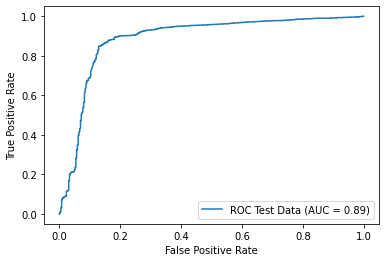

In [76]:
from sklearn import svm

def svm_model(training_unlabelled, training_labels, test_unlabelled, test_labels):
    print("SVM C=10, gamma=1, class_weight=balanced")
    model = svm.SVC(class_weight="balanced", C=10, gamma=1)
    print("Training model")
    model.fit(training_unlabelled, training_labels)
    print("Trained model")
    print()
    
    print("Predicting")
    predictions = model.predict(test_unlabelled)
    print("Predicted")
    print()
    
    train_score = model.score(training_unlabelled, training_labels)
    test_score = model.score(test_unlabelled, test_labels)
    overfit = train_score - test_score
    
    print("Train Score", train_score)
    print("Test Score", test_score)
    print("Overfit", overfit)
    print()
    
    model_metrics(test_labels, predictions)
    plot_roc_curve(model, test_unlabelled, test_labels, name="ROC Test Data")
    plt.show()

svm_model(training_unlabelled, training_labels, test_unlabelled, test_labels)

Try a random forest

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Took ~3 minutes on an i7-9700K@4.7GHz with 8 concurrent threads
def rf_cross_validation_grid_search(training_unlabelled, training_labels):
    cv_params = {
        "max_depth": [20, 50, 100, 120, 150],
        "max_features": ["auto", "log2", None],
        "n_estimators": [100, 200, 300],
        "class_weight": ["balanced", "auto"]
    }
    
    gs = GridSearchCV(RandomForestClassifier(), cv_params, refit=True, verbose=2, n_jobs=-1)
    gs_result = gs.fit(training_unlabelled, training_labels)
    
    print("Best Estimator")
    print(gs_result.best_estimator_)
    print()
    
    print("Best Score")
    print(gs_result.best_score_)
    print()
    
    print("Best Params")
    print(gs_result.best_params_)
    print()

#rf_cross_validation_grid_search(training_unlabelled, training_labels)

RFC class_weight='balanced', max_depth=20, max_features='auto', n_estimators=300
Training model
Trained model

Predicting
Predicted

Train Score 0.9700171086398631
Test Score 0.9464125336792735
Overfit 0.023604574960589653

Test Samples 10021
True Positives 9287
False Positives 190
True Negatives 197
False Negatives 347

Recall 0.9639817313680714
Precision 0.9799514614329429
MCC 0.40226163343432003
BAS 0.7365128295083252
F1 0.9719009994244153

True Positive Rate (Sens / Recall) 0.9639817313680714
False Positive Rate (Spec) 0.4909560723514212
Positive Predictive Value (PPV / Precision) 0.9799514614329429
Negative Predictive Value (NPV) 0.36213235294117646
True Negative Rate 0.5090439276485789
False Negative Rate 0.036018268631928585
False Discovery Rate 0.020048538567057086

BER 0.2634871704916749
Utility 0.7365128295083251

AUC


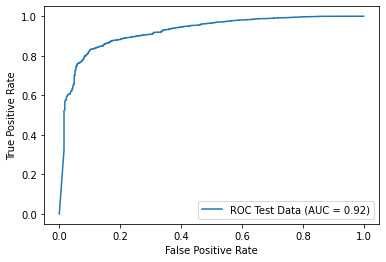

In [78]:
from sklearn.ensemble import RandomForestClassifier

def rf_model(training_unlabelled, training_labels, test_unlabelled, test_labels):
    print("RFC class_weight='balanced', max_depth=20, max_features='auto', n_estimators=300")
    model = RandomForestClassifier(class_weight='balanced', max_depth=20, max_features='auto', n_estimators=300)
    print("Training model")
    model.fit(training_unlabelled, training_labels)
    print("Trained model")
    print()
    
    print("Predicting")
    predictions = model.predict(test_unlabelled)
    print("Predicted")
    print()
    
    train_score = model.score(training_unlabelled, training_labels)
    test_score = model.score(test_unlabelled, test_labels)
    overfit = train_score - test_score
    
    print("Train Score", train_score)
    print("Test Score", test_score)
    print("Overfit", overfit)
    print()
    
    model_metrics(test_labels, predictions)
    plot_roc_curve(model, test_unlabelled, test_labels, name="ROC Test Data")
    plt.show()

rf_model(training_unlabelled, training_labels, test_unlabelled, test_labels)

Naive Bayes - no hyperparameters so no need to tune

Naive Bayes: Gaussian
Training model
Trained model

Predicting
Predicted

Train Score 0.15269461077844312
Test Score 0.15437581079732562
Overfit -0.0016812000188825005

Test Samples 10021
True Positives 1170
False Positives 10
True Negatives 377
False Negatives 8464

Recall 0.1214448827070791
Precision 0.9915254237288136
MCC 0.05715419557803857
BAS 0.5478025447127126
F1 0.2163861660810061

True Positive Rate (Sens / Recall) 0.1214448827070791
False Positive Rate (Spec) 0.025839793281653745
Positive Predictive Value (PPV / Precision) 0.9915254237288136
Negative Predictive Value (NPV) 0.04264223504128492
True Negative Rate 0.9741602067183462
False Negative Rate 0.8785551172929209
False Discovery Rate 0.00847457627118644

BER 0.45219745528728733
Utility 0.5478025447127126

AUC


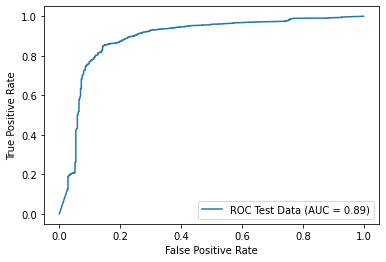

In [79]:
from sklearn.naive_bayes import GaussianNB

# Performs really poorly
def nb_model(training_unlabelled, training_labels, test_unlabelled, test_labels):
    print("Naive Bayes: Gaussian")
    model = GaussianNB()
    print("Training model")
    model.fit(training_unlabelled, training_labels)
    print("Trained model")
    print()
    
    print("Predicting")
    predictions = model.predict(test_unlabelled)
    print("Predicted")
    print()
    
    train_score = model.score(training_unlabelled, training_labels)
    test_score = model.score(test_unlabelled, test_labels)
    overfit = train_score - test_score
    
    print("Train Score", train_score)
    print("Test Score", test_score)
    print("Overfit", overfit)
    print()
    
    model_metrics(test_labels, predictions)
    plot_roc_curve(model, test_unlabelled, test_labels, name="ROC Test Data")
    plt.show()

nb_model(training_unlabelled, training_labels, test_unlabelled, test_labels)

Logistic Regression

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

def lr_cross_validation_grid_search(training_unlabelled, training_labels):
    cv_params = {
        "C": [0.01, 0.1, 1, 10, 20],
        "penalty": ["l1", "l2"],
        "max_iter": [100, 200, 300, 400, 500],
        "class_weight": ["auto", "balanced"]
    }
    
    gs = GridSearchCV(LogisticRegression(class_weight="balanced"), cv_params, refit=True, verbose=2, n_jobs=-1)
    gs_result = gs.fit(training_unlabelled, training_labels)
    
    print("Best Estimator")
    print(gs_result.best_estimator_)
    print()
    
    print("Best Score")
    print(gs_result.best_score_)
    print()
    
    print("Best Params")
    print(gs_result.best_params_)
    print()

#lr_cross_validation_grid_search(training_unlabelled, training_labels)

Logistic Regression; C=10, class_weight='auto', max_iter=400
Training model
Trained model

Predicting
Predicted

Train Score 0.9686484174508126
Test Score 0.9684662209360343
Overfit 0.0001821965147783544

Test Samples 10021
True Positives 9585
False Positives 267
True Negatives 120
False Negatives 49

Recall 0.9949138467926095
Precision 0.9728989037758831
MCC 0.4563949128185796
BAS 0.6524956830862272
F1 0.9837832289849122

True Positive Rate (Sens / Recall) 0.9949138467926095
False Positive Rate (Spec) 0.689922480620155
Positive Predictive Value (PPV / Precision) 0.9728989037758831
Negative Predictive Value (NPV) 0.7100591715976331
True Negative Rate 0.31007751937984496
False Negative Rate 0.005086153207390492
False Discovery Rate 0.02710109622411693

BER 0.34750431691377276
Utility 0.6524956830862272

AUC


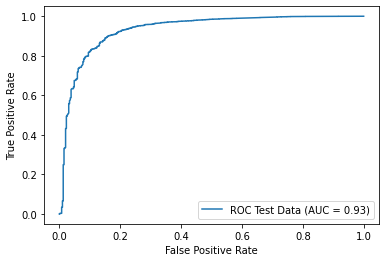

In [81]:
from sklearn.linear_model import LogisticRegression

def lr_model(training_unlabelled, training_labels, test_unlabelled, test_labels):
    print("Logistic Regression; C=10, class_weight='auto', max_iter=400")
    model = LogisticRegression(C=10, class_weight='auto', max_iter=400)
    print("Training model")
    model.fit(training_unlabelled, training_labels)
    print("Trained model")
    print()
    
    print("Predicting")
    predictions = model.predict(test_unlabelled)
    print("Predicted")
    print()
    
    train_score = model.score(training_unlabelled, training_labels)
    test_score = model.score(test_unlabelled, test_labels)
    overfit = train_score - test_score
    
    print("Train Score", train_score)
    print("Test Score", test_score)
    print("Overfit", overfit)
    print()
    
    model_metrics(test_labels, predictions)
    plot_roc_curve(model, test_unlabelled, test_labels, name="ROC Test Data")
    plt.show()

lr_model(training_unlabelled, training_labels, test_unlabelled, test_labels)

Neural Network

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

def nn_cross_validation_grid_search(training_unlabelled, training_labels):
    cv_params = {
        'hidden_layer_sizes': [(5, 2), (50,50,50), (50,100,50), (100,)],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam', 'lbfgs'],
        'alpha': [0.0001, 0.05],
        'learning_rate': ['constant','adaptive'],
        "max_iter": [100, 200, 300]
    }
    
    gs = GridSearchCV(MLPClassifier(), cv_params, refit=True, verbose=2, n_jobs=-1)
    gs_result = gs.fit(training_unlabelled, training_labels)
    
    print("Best Estimator")
    print(gs_result.best_estimator_)
    print()
    
    print("Best Score")
    print(gs_result.best_score_)
    print()
    
    print("Best Params")
    print(gs_result.best_params_)
    print()

#nn_cross_validation_grid_search(training_unlabelled, training_labels)

MLPClassifier; activation='tanh', learning_rate='adaptive', max_iter=100
Training model


C:\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Trained model

Predicting
Predicted

Train Score 0.9719418306244654
Test Score 0.9698632870970961
Overfit 0.0020785435273692476

Test Samples 10021
True Positives 9563
False Positives 231
True Negatives 156
False Negatives 71

Recall 0.9926302678015362
Precision 0.9764141311006739
MCC 0.5124670475014421
BAS 0.6978655214976673
F1 0.9844554251595635

True Positive Rate (Sens / Recall) 0.9926302678015362
False Positive Rate (Spec) 0.5968992248062015
Positive Predictive Value (PPV / Precision) 0.9764141311006739
Negative Predictive Value (NPV) 0.6872246696035242
True Negative Rate 0.40310077519379844
False Negative Rate 0.007369732198463774
False Discovery Rate 0.023585868899326116

BER 0.30213447850233266
Utility 0.6978655214976673

AUC


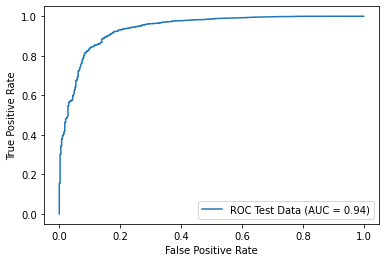

In [83]:
from sklearn.neural_network import MLPClassifier

def nn_model(training_unlabelled, training_labels, test_unlabelled, test_labels):
    print("MLPClassifier; activation='tanh', learning_rate='adaptive', max_iter=100")
    model = MLPClassifier(activation='tanh', learning_rate='adaptive', max_iter=100)
    print("Training model")
    model.fit(training_unlabelled, training_labels)
    print("Trained model")
    print()
    
    print("Predicting")
    predictions = model.predict(test_unlabelled)
    print("Predicted")
    print()
    
    train_score = model.score(training_unlabelled, training_labels)
    test_score = model.score(test_unlabelled, test_labels)
    overfit = train_score - test_score
    
    print("Train Score", train_score)
    print("Test Score", test_score)
    print("Overfit", overfit)
    print()
    
    model_metrics(test_labels, predictions)
    plot_roc_curve(model, test_unlabelled, test_labels, name="ROC Test Data")
    plt.show()

nn_model(training_unlabelled, training_labels, test_unlabelled, test_labels)

Voting Classifier - Ensemble of the best ones we have already

In [84]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import svm

def vc_model(training_unlabelled, training_labels, test_unlabelled, test_labels):
    print("VotingClassifier; NN, RF, LR, SVM using previously determined hyperparameters")
    
    nn_model = MLPClassifier(activation='tanh', learning_rate='adaptive', max_iter=100)
    rf_model = RandomForestClassifier(class_weight='balanced', max_depth=20, max_features='auto', n_estimators=300)
    lr_model = LogisticRegression(C=10, class_weight='auto', max_iter=400)
    sv_model = svm.SVC(class_weight="balanced", C=10, gamma=1)
    
    model = VotingClassifier(estimators=[
        ("nn", nn_model), ("rf", rf_model), ("lr", lr_model), ("sv", sv_model)
    ])
    print("Training model")
    
    model.fit(training_unlabelled, training_labels)
    print("Trained model")
    print()
    
    print("Predicting")
    predictions = model.predict(test_unlabelled)
    print("Predicted")
    print()
    
    train_score = model.score(training_unlabelled, training_labels)
    test_score = model.score(test_unlabelled, test_labels)
    overfit = train_score - test_score
    
    print("Train Score", train_score)
    print("Test Score", test_score)
    print("Overfit", overfit)
    print()
    
    model_metrics(test_labels, predictions, ignore_auc=True)

vc_model(training_unlabelled, training_labels, test_unlabelled, test_labels)

VotingClassifier; NN, RF, LR, SVM using previously determined hyperparameters
Training model


C:\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Trained model

Predicting
Predicted

Train Score 0.9754491017964072
Test Score 0.956790739447161
Overfit 0.018658362349246227

Test Samples 10021
True Positives 9376
False Positives 175
True Negatives 212
False Negatives 258

Recall 0.9732198463774133
Precision 0.9816773112763062
MCC 0.47483501167241277
BAS 0.7605117319742364
F1 0.9774302840761012

True Positive Rate (Sens / Recall) 0.9732198463774133
False Positive Rate (Spec) 0.45219638242894056
Positive Predictive Value (PPV / Precision) 0.9816773112763062
Negative Predictive Value (NPV) 0.451063829787234
True Negative Rate 0.5478036175710594
False Negative Rate 0.02678015362258667
False Discovery Rate 0.018322688723693855

BER 0.23948826802576362
Utility 0.7605117319742364

